### **SENAI-DF - Python : Artificial Intelligence - Vespertino - QUA.494.002 - 23/09/2024**
### Semana Machine Learning - ml_pln_002

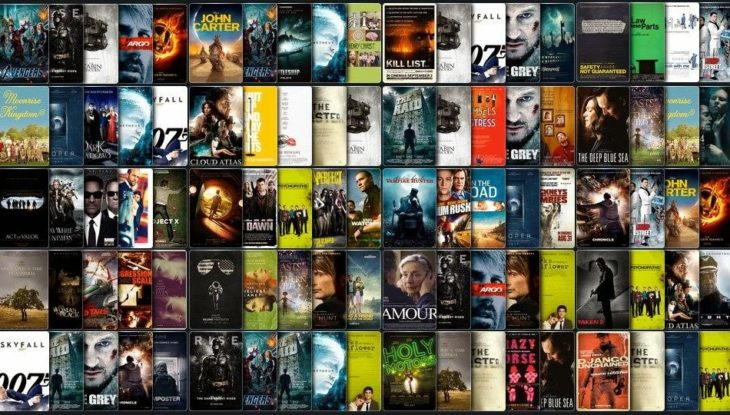

In [6]:
# Exibe a imagem
from IPython.display import Image, display

display(Image(filename='dados/filmes.jpg'))


**Situação Problema**                                                                                                                        |

De acordo com o que foi abordado na introdução, o objetivo do curso é criar um analisador de sentimentos.

Em outras palavras, construiremos um modelo de Machine Learning capaz de interpretar textos e classificá-los conforme a emoção expressa, identificando se o conteúdo agradou ou não.

Para isso, faremos uso de uma base de dados do IMDb (Internet Movie Database), uma plataforma que armazena informações sobre filmes, séries, comerciais, músicas e até videogames.

In [7]:
from IPython.display import Image

# URL da imagem no GitHub
url = 'https://github.com/romulosilvestre/semanamachinelearning-datasets/raw/main/kaggle.png'

# Exibe a imagem
Image(url=url)


> **Desafio: Base de Dados em Inglês**
>
> O único desafio é que a base de dados original está totalmente em inglês, e nosso objetivo é desenvolver algo em português, tornando o processo mais acessível e próximo da nossa realidade.
>
> **Solução: Kaggle**
>
> Para contornar essa questão, utilizaremos um conjunto de dados disponível no **Kaggle**. Para encontrá-lo:
>
> 1. Acesse o site digitando "*Kaggle*" no Google e selecionando a primeira opção.
> 2. Na plataforma, busque por "*imdb pt*" na barra de pesquisa.
>
> Isso nos permitirá trabalhar com uma base de dados adaptada para nosso contexto em português.


In [8]:
from IPython.display import Image

# URL da imagem no GitHub
url = 'https://github.com/romulosilvestre/semanamachinelearning-datasets/raw/main/IMDB_PT.PNG'

# Exibe a imagem
Image(url=url)


## Escolha da Base de Dados: **IMDB PT-BR**

Entre os resultados, escolheremos a base de dados **IMDB PT-BR**, que é uma tradução automática de uma das bases do IMDb realizada por um membro da comunidade. Essa base contém aproximadamente **50 mil resenhas de filmes**, já **categorizadas** como _positivas_ ou _negativas_, originalmente em inglês.

O trabalho realizado foi a **tradução automática** dessas resenhas para o **português**, tornando-as disponíveis para nosso uso, ainda que de forma automatizada. Essa base é valiosa para trabalhos de **processamento de linguagem natural (NLP)** em português, oferecendo uma boa quantidade de dados para experimentos e modelagem.

---

> **Resumo**:
> - Base: **IMDB PT-BR**
> - Quantidade: **50 mil resenhas**
> - Idioma: **Português** (traduzido automaticamente do inglês)
> - Polaridade: **Positiva** ou **Negativa**
>
> Esta base é amplamente utilizada em estudos de **análise de sentimentos** e **aprendizado de máquina**.

---


## Download da Base de Dados

Para fazer o download da base de dados, siga os passos abaixo:

1. **Cadastro:**
   - É necessário realizar um cadastro previamente na plataforma.

2. **Download:**
   - Após o cadastro, clique no botão localizado no topo da página para iniciar o download.

3. **Salvar Dados:**
   - Salve os dados em um diretório local em seu computador.

---

### Ambiente de Desenvolvimento

Durante o curso, utilizaremos o **Jupyter Notebook** para o desenvolvimento do projeto. No entanto, você também pode optar por outras alternativas, como:

- **Google Colab:** Uma ferramenta online que permite executar notebooks em ambientes de nuvem.
- **Kernels do Kaggle:** Uma plataforma prática para análise de dados e competições de machine learning.

---

### Preparação

Após o download e a instalação do ambiente de desenvolvimento, você estará pronto para começar a trabalhar com os dados e explorar suas análises!

---

> **Dica:** Sempre mantenha seus diretórios organizados para facilitar a gestão dos arquivos e facilitar seu trabalho no projeto.


# Análise Exploratória   



## Leitura da Base de Dados com Pandas

Para realizar a leitura da base de dados, vamos utilizar a poderosa biblioteca **Pandas**. O primeiro passo é importar a biblioteca, utilizando o seguinte comando:

```python
import pandas as pd


In [9]:
! pip install pandas

In [10]:
import pandas as pd

In [11]:
resenhas = pd.read_csv('datasets/imdb-reviews-pt-br.csv')

In [12]:
resenhas

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


### Que tipo de variável é?

- Analisar a imagem do tipo de variável e refletir sobres os tipos
- Definir quais os tipos

In [13]:
from IPython.display import Image, display

# Link da imagem
url = "https://github.com/romulosilvestre/semanamachinelearning-datasets/raw/main/tiposvariaveis.jpg"

# Exibir a imagem
display(Image(url=url))


# Machine Learning



Machine Learning como vocês pesquisaram é aprendizado de máquina,  precisamos de uma parte para treinar o modelo e uma parte para testar o nosso modelo. Então, iremos separar os nossos dados em treino e teste; ao buscarmos por "train test" no Google, um dos primeiros resultados será o SKLearn Model Selection, página acessível neste link. Utilizaremos esta biblioteca, Sklearn e o método train_test_split, para segregar os nossos dados.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# EDA - Análise Exploratória de Dados

# Treino e Teste (70/30)


In [14]:
# importação do sklearn

from sklearn.model_selection import train_test_split


In [15]:

treino, teste, classe_treino, classe_teste = train_test_split(resenhas.text_pt,
                                                              resenhas.sentiment,
                                                              random_state = 42)

In [16]:
treino

1348     Embora o filme tenha sido apenas assim, o clos...
27466    Este é provavelmente um dos piores filmes que ...
29998    De vez em quando, um filme irá varrer ao seu r...
48186    Este é um conto completamente diabólico de quã...
26473    Lenta, chata, extremamente repetitiva. Não adm...
                               ...                        
11284    Naach teria ganhado um Razzie para o Pior Film...
44732    Apenas assisti a esse filme em DVD e achei a a...
38158    Melhor show desde Seinfeld. Ela é realmente mu...
860      Eu pareço estar discordando com muitas pessoas...
15795    Minhas duas filhas de 11 e 13 anos e eu tive s...
Name: text_pt, Length: 37094, dtype: object

In [17]:
teste

12532    Isso era incomum: um filme moderno que era ult...
35445    Alguns dos meus velhos amigos sugeriram que eu...
20279    Que prazer. Isto é realmente uma paródia. Some...
2969     Há cerca de dez minutos a meio da Strangeland,...
45161    Otelo, a clássica história de Shakespearen sob...
                               ...                        
16421    Crescendo como filho do cinema, uma das trilog...
39861    Este filme é o melhor filme de todos os tempos...
309      "Electra Glide in Blue" é um movimento lento e...
20638    Eu amo esse filme ! Eu acho que já vi 5 vezes ...
38935    Eu vi alguns filmes sobre transtornos alimenta...
Name: text_pt, Length: 12365, dtype: object

In [18]:
classe_treino

1348     neg
27466    neg
29998    neg
48186    pos
26473    neg
        ... 
11284    neg
44732    pos
38158    pos
860      neg
15795    pos
Name: sentiment, Length: 37094, dtype: object

In [19]:
classe_teste

12532    pos
35445    neg
20279    pos
2969     neg
45161    pos
        ... 
16421    pos
39861    pos
309      neg
20638    pos
38935    pos
Name: sentiment, Length: 12365, dtype: object

`classe_treino` e `classe_teste` representam os rótulos (ou labels) no contexto de aprendizado supervisionado por classificação.

In [21]:
from IPython.display import Image, display

# Link da imagem
url = "https://github.com/romulosilvestre/semanamachinelearning-datasets/raw/main/machine-learning.png"

# Exibir a imagem
display(Image(url=url))


In [22]:
from IPython.display import Image, display

# Link da imagem
url = "https://github.com/romulosilvestre/semanamachinelearning-datasets/raw/main/machine-learning-types.png"

# Exibir a imagem
display(Image(url=url))


- Quando você precisa modelar um problema no qual a variável dependente for do tipo categórica e os dados puderem ser agrupados em duas classes, considere  usar o tema deste estudo: A regressão logística.

- O que é uma variável dependente e independente?

- Na estatística, as variáveis dependentes e independentes são conceitos fundamentais usados em análises de dados e modelagem.

- Aqui está uma explicação de cada uma, acompanhada de exemplos:

- Variável Independente
  - Definição: É a variável que é manipulada ou controlada em um experimento.
  - Ela é considerada "independente" porque seu valor não depende de outras variáveis no contexto do estudo.
  - Exemplo: Se você está estudando o efeito da quantidade de horas de estudo no desempenho em um exame, a variável independente seria as horas de estudo.

- Variável Dependente

  - Definição: É a variável que é medida ou observada no experimento. - Seu valor depende da manipulação da variável independente.
  - Exemplo: No mesmo estudo sobre horas de estudo, a variável dependente seria o desempenho no exame, que pode ser medido em pontos ou notas.

- Resumo com Exemplo

- Estudo sobre o impacto da temperatura na taxa de crescimento de plantas:

  - Variável Independente: Temperatura (°C)
  - Variável Dependente: Taxa de crescimento das plantas (cm por semana)

- Outros Exemplos

- Estudo sobre publicidade e vendas:
  - Variável Independente: Quantidade de dinheiro gasto em publicidade
  - Variável Dependente: Número de vendas realizadas

- Estudo sobre dieta e peso:
  - Variável Independente: Calorias consumidas por dia
  - Variável Dependente: Peso corporal (kg)

Esses conceitos são cruciais para entender como as variáveis se relacionam em análises estatísticas e experimentos.

### Em contextos como aprendizado de máquina e modelagem estatística, a variável dependente é frequentemente chamada de "variável alvo" porque o objetivo é prever seus valores a partir das variáveis independentes (ou características).

In [23]:
# Regressão logística - quando precisamos modelar um problema no qual a variável dependente é categórica.
# Os dados podem ser agrupados em duas classes
# Muito utilizada no século XX
# Utilizada em pesquisas biologicas
# Depois utilizada em ciências sociais
# Pesquisa médica - controle de doenças agrupando classes
# Bancos - risco de crédito
# Pesquisas eleitorais - intenções de votos
# Por mais , que tenha o nome regressão, a regressão logística trata-se mais de um algoritmo de classificação.
# A regressão logística deve ser utilizada em problemas de classificação binários
# Problemas para os quais os dados devem ser classificados entre dois grupos distintos e mutuamente excludentes.
# O cliente comprou ou não um determinado produto
# Uma transação com cartão de crédito é legitima ou se trata de uma fraude
# Uma mensagem de e-mail é ou não spam?
# O paciente esta com diabetes


from sklearn.linear_model import LogisticRegression

In [24]:
regressao_logistica = LogisticRegression()

In [25]:
# criando um objeto da classe LogisticRegression
regressao_logistica = LogisticRegression()
# Treinando
regressao_logistica.fit(treino, classe_treino)
# Acuracia - avalia a precisão do modelo usando o método score
# passamos os dados de teste
acuracia = regressao_logistica.score(teste, classe_teste)
# mostrando acuracia
print(acuracia)

ValueError: could not convert string to float: 'Embora o filme tenha sido apenas assim, o closed caption foi de longe o melhor que eu já vi! Na maioria das vezes, a ortografia é terrível e a legenda está fora de sincronia. Eu uso o closed captioning mesmo que eu possa ouvir bem, mas acho que muitos atores resmungam. Também muitas vezes a trilha sonora substitui o diálogo. Obrigado!'

# Gerou uma exceção lembra?

ValueError

# Qual a solução para essa exceção?


-  A solução é transformar texto em números. Para isso usaremos a PLN.
- Melhorando os dados (análise exploratória de dados)
- Vamos traduzir nossos textos para dados que o machine learning consegue entender?

### O que aprendemos até agora?

- Um modelo de machine learning para classificar dados textuais.
- Como realizar uma pré-análise de dados textuais.
- Um padrão de classificação mais usual para análise de sentimento.

# Bag Of Words (Sacola de Palavras)

O modelo Bag of Words (BoW) é uma abordagem simples e popular em Processamento de Linguagem Natural (PLN) para transformar texto em uma representação numérica. Aqui estão alguns exemplos simples com código Python usando a biblioteca scikit-learn.

# Corpus - meu conjunto de texto que será analisado



In [26]:
from IPython.display import Image, display

# Link da imagem
url = "https://github.com/romulosilvestre/semanamachinelearning-datasets/raw/main/tela1.png"

# Exibir a imagem
display(Image(url=url))


In [ ]:
# nosso corpus será apenas esse texto para ser mais didático
# agora vamos criar nosso vocabulário

In [27]:
from IPython.display import Image, display

# Link da imagem
url = "https://github.com/romulosilvestre/semanamachinelearning-datasets/raw/main/tela2.png"

# Exibir a imagem
display(Image(url=url))

In [28]:
from IPython.display import Image, display

# Link da imagem
url = "https://github.com/romulosilvestre/semanamachinelearning-datasets/raw/main/tela3.png"

# Exibir a imagem
display(Image(url=url))

Tenho dois vetores
Cada vetor para cada frase
Assim os algoritmos de machine learning irão entender
Além dela traduzir para os modelos de IA, também verifica a repetição das palavras



In [29]:
from IPython.display import Image, display

# Link da imagem
url = "https://github.com/romulosilvestre/semanamachinelearning-datasets/raw/main/tela4.png"

# Exibir a imagem
display(Image(url=url))

In [30]:
from IPython.display import Image, display

# Link da imagem
url = "https://github.com/romulosilvestre/semanamachinelearning-datasets/raw/main/tela5.png"

# Exibir a imagem
display(Image(url=url))

In [31]:
from IPython.display import Image, display

# Link da imagem
url = "https://github.com/romulosilvestre/semanamachinelearning-datasets/raw/main/tela6.png"

# Exibir a imagem
display(Image(url=url))

In [32]:
from IPython.display import Image, display

# Link da imagem
url = "https://github.com/romulosilvestre/semanamachinelearning-datasets/raw/main/tela7.png"

# Exibir a imagem
display(Image(url=url))

In [33]:
# vamos implementar nossa sacola em python
# feature_extraction
# função
from sklearn.feature_extraction.text import CountVectorizer

#corpus
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

# aplicar o CountVectorizer( ) - ela vai pegar nossa frase e criar um vetor
vetorizar = CountVectorizer(lowercase=False)
# aplicar agora no nosso corpo
# método fit_transform - ele vai receber o array e criar nossa representação bag of words
bag_of_words = vetorizar.fit_transform(texto)


In [34]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

Matriz 2 x 5

In [35]:
# palavras do meu vocabulário
# por padrão ele já faz uma transformação tudo em mínusculo
# por enquanto eu quero
vetorizar.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [36]:
matriz = pd.DataFrame(bag_of_words,
                      columns=vetorizar.get_feature_names())

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [40]:
"""
Deu um erro.
O que acontece.
Matriz sparsa
Martriz cheia de zeros
É muito zero
Vou gastar muita memória
Estrutura de Dados
Armazenar diferentes de dados
Ela é diferente de uma matriz convencional
Gerou um erro
Porque não interpreta uma matriz sparsa
Podemos usar o pandas
"""

'\nDeu um erro.\nO que acontece.\nMatriz sparsa\nMartriz cheia de zeros\nÉ muito zero\nVou gastar muita memória\nEstrutura de Dados\nArmazenar diferentes de dados\nEla é diferente de uma matriz convencional\nGerou um erro\nPorque não interpreta uma matriz sparsa\nPodemos usar o pandas\n'

In [37]:
import pandas as pd

In [38]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                                               columns=vetorizar.get_feature_names_out())

In [39]:
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0
